<a href="https://colab.research.google.com/github/Lucas3044/mltest/blob/main/10_20(%ED%83%80%EC%9D%B4%EB%82%98%EB%8B%89_%EB%B6%84%EC%84%9D_%EC%BA%90%EA%B8%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리 실습

![%EC%A3%BC%ED%94%BC%ED%84%B0%EC%97%90%EC%84%9C%20%EC%84%A4%EC%B9%98%EA%B0%80%20%EC%95%88%EB%90%A0%EB%95%8C.png](attachment:%EC%A3%BC%ED%94%BC%ED%84%B0%EC%97%90%EC%84%9C%20%EC%84%A4%EC%B9%98%EA%B0%80%20%EC%95%88%EB%90%A0%EB%95%8C.png)

![image.png](attachment:image.png)

![image-2.png](attachment:image-2.png)

*  캐글 : https://www.kaggle.com
*  데이콘 : https://dacon.io
*  캐글 대학생 그랜드마스터 검색 해보기

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

### Titanic Top 4% with ensemble modeling
*  https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling
### EDA To Prediction (DieTanic)
*  https://www.kaggle.com/ash316/eda-to-prediction-dietanic
### 들어가기
*  타이타닉은 아시다시피, 사상 최대 해난사고로써, 1,500여명의 희생자
*  타이타닉에 탑승한 사람들의 신상정보를 활용
*  승선한 사람들의 생존여부를 예측하는 모델을 생성
### 프로세스
*  데이터셋 확인

  -대부분의 캐글 데이터들은 잘 정제되어 있습니다. 하지만 가끔 null data가 존재

*  탐색적 데이터 분석(exploratory data analysis)

  *  여러 feature 들을 개별적으로 분석하고, feature 들 간의 상관관계를 확인
  *  여러 시각화 툴을 사용하여 insight 찾기
*  feature engineering

  *  NaN 값에 평균값을 넣어준다거나 삭제같은 preprocessing이 필요
  *  모델을 세우기에 앞서, 모델의 성능을 높일 수 있도록 feature 들을 engineering
  *  one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등
*  model 만들기

  *  sklearn 을 사용해 모델 생성
  *  딥러닝을 위해 tensorflow, pytorch 등을 사용
  *  모델 학습 및 예측
*  trainset 을 가지고 모델을 학습

  *  testset 을 가지고 prediction
*  모델 평가

  *  예측 성능이 원하는 수준인지 판단

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

![image.png](attachment:image.png)

In [ ]:
#!pip install seaborn
#!pip install missingno

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid', color_codes=True)

### 탐색적 자료분석

In [ ]:
data = ['./data/titanic/train.csv','./data/titanic/test.csv']
train = pd.read_csv(data[0])
test = pd.read_csv(data[1])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 결측치 처리 Null data check

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot: >

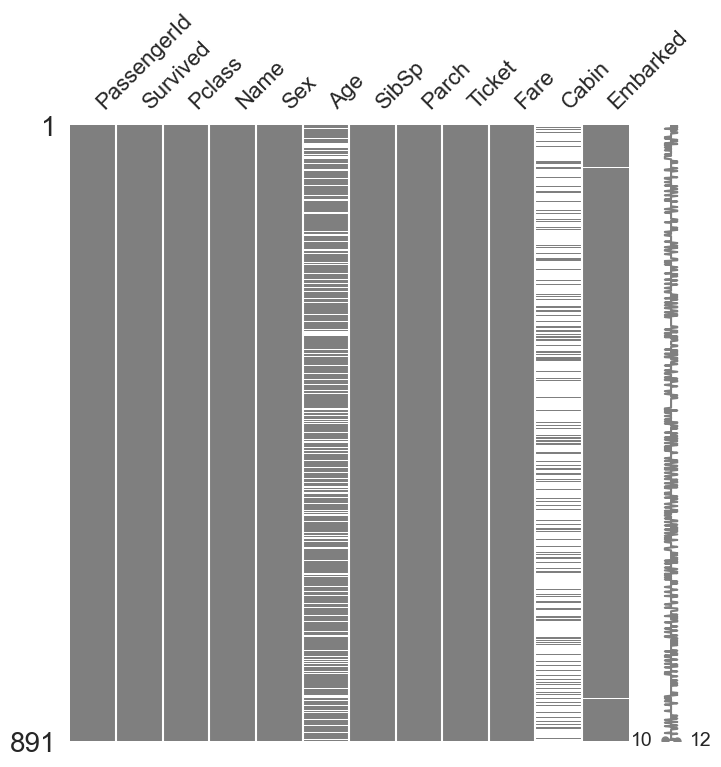

In [ ]:
msno.matrix(df=train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.5, 0.5))  #iloc연습겸사용

<AxesSubplot: >

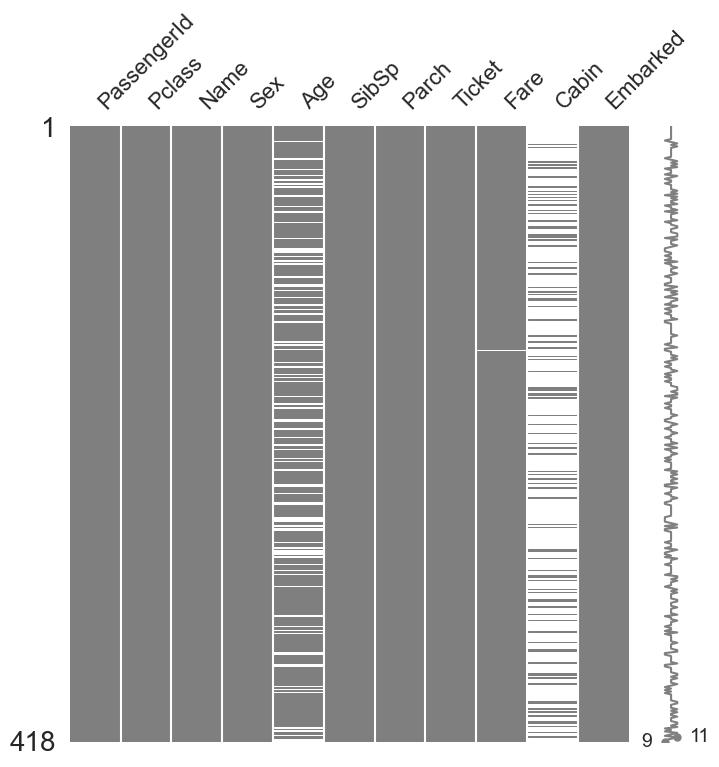

In [ ]:
msno.matrix(df=test, figsize=(8, 8), color=(0.5, 0.5, 0.5))  #iloc연습겸사용

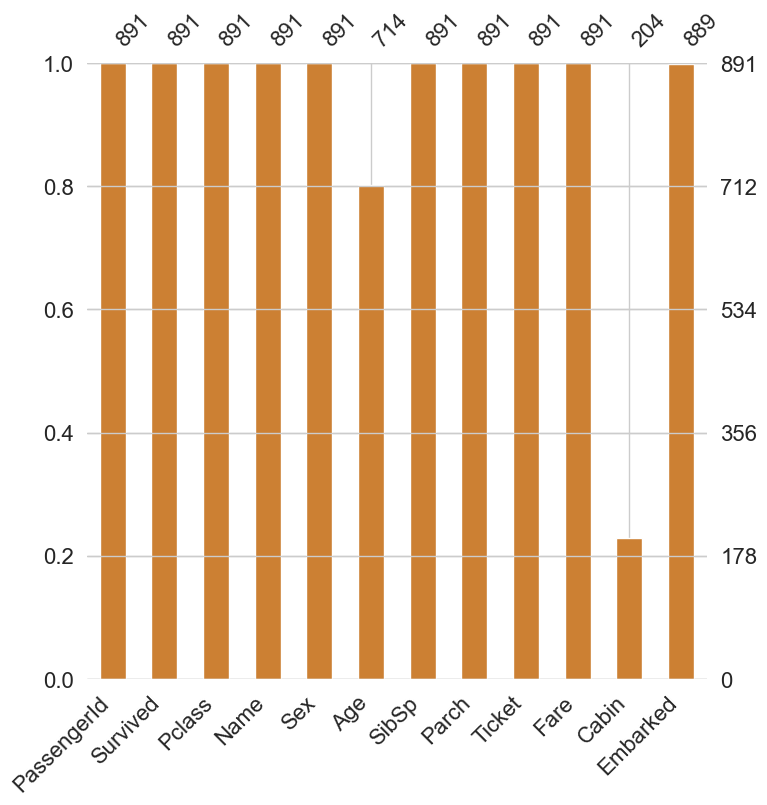

In [ ]:
msno.bar(df=train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
plt.show()

<AxesSubplot: >

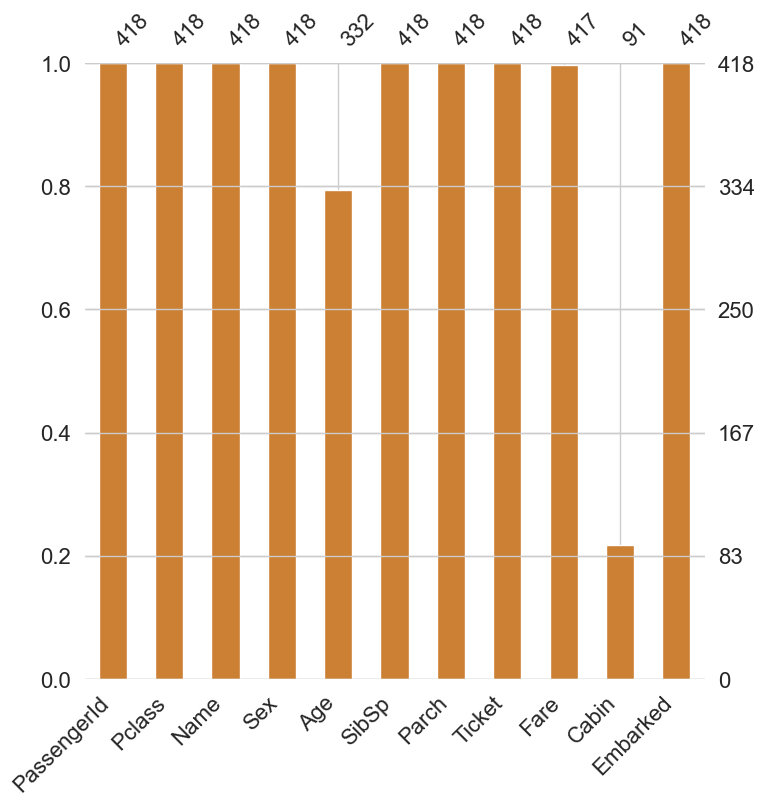

In [ ]:
msno.bar(df=test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

### Target label 확인 - Servived
*  전체 확인
  *  target label 이 어떤 distribution 을 가지고 있는 지 확인
  *  binary classification 문제의 경우에서, 1과 0의 분포 확인

In [ ]:
train[['Survived','Age']][:3]

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0


In [ ]:
ox = train['Survived'].value_counts()

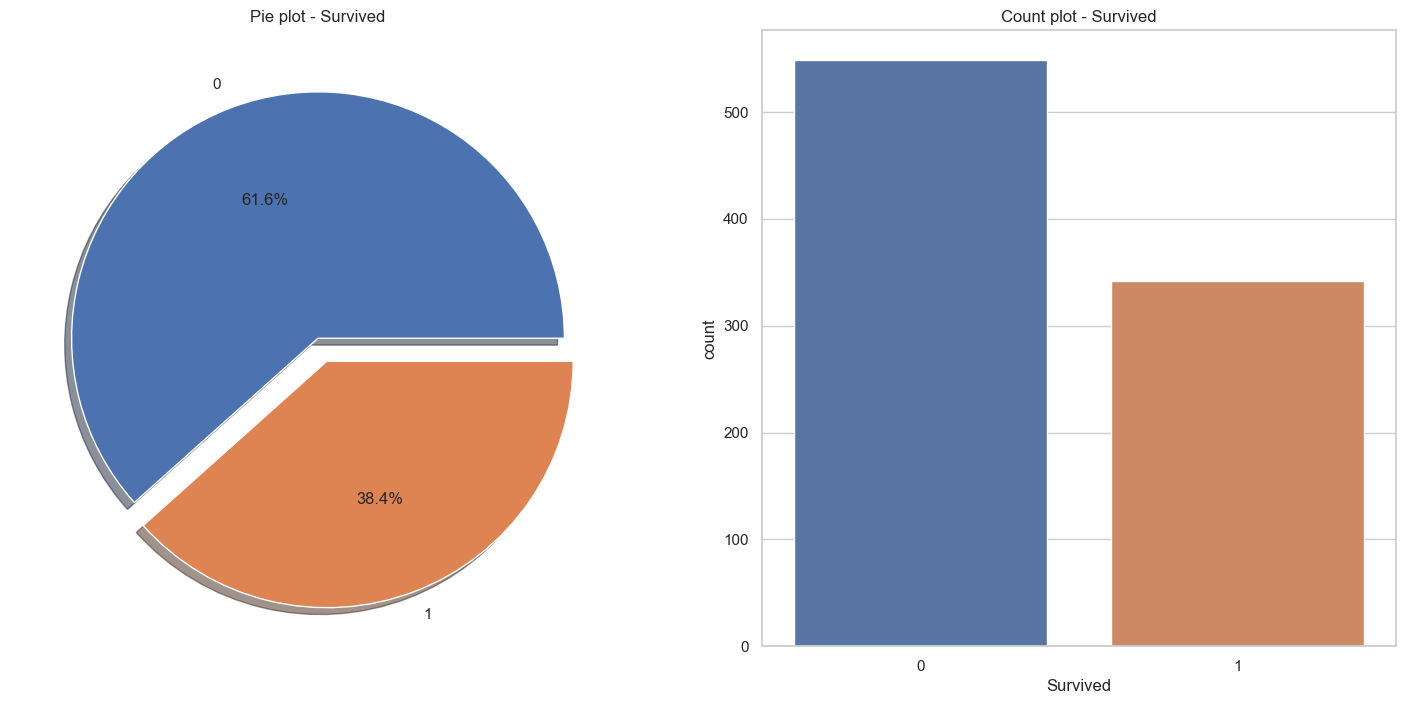

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

train['Survived'].value_counts().plot.pie(
    explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=train, ax=ax[1])  #x=값을 넣어햐 한다
ax[1].set_title('Count plot - Survived')

plt.show()

*  사망 61.6% / 생존 38.4%
*  target label 의 분포가 제법 균일(balanced)
*  불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우 모델이 모든것을 1이라 해도 정확도가 99%
*  0을 찾는 문제라면 이 모델은 원하는 결과를 줄 수 없게 됨
### 범주형 features에 대한 확인 - Survived
*  pclass 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
*  sex 승객 성별
*  sibsp 동반한 형제자매, 배우자 수
*  parch 동반한 부모, 자식 수
*  cabin 객실 번호
*  embarked 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

In [ ]:
# 살았는지 죽었는지 두개의 막대차트로 표시
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))  

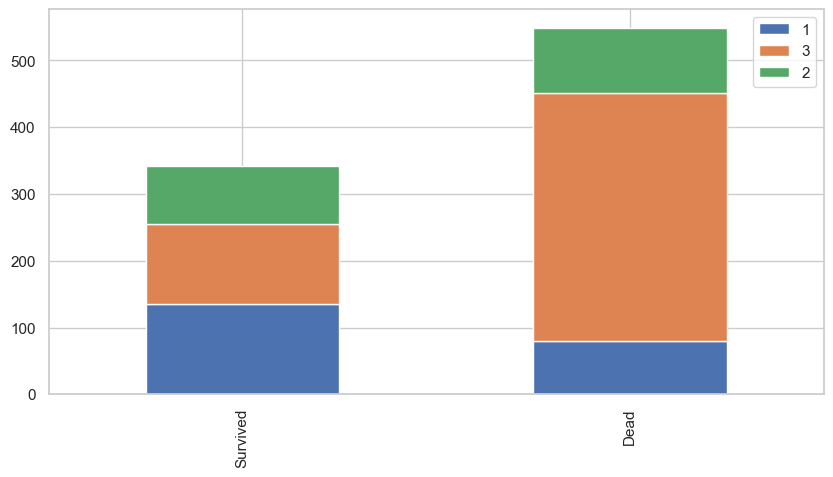

In [ ]:
# 차트는 1등급 클래스가 다른 클래스보다 생존할 가능성이 더 높다
bar_chart('Pclass')

In [ ]:
train['Survived']==1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [ ]:
train[train['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
train[train['Survived']==1]['Pclass']  #Pclass값만 보겠다

1      1
2      3
3      1
8      3
9      2
      ..
875    3
879    1
880    2
887    1
889    1
Name: Pclass, Length: 342, dtype: int64

In [ ]:
train[train['Survived']==1]['Pclass'].value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [ ]:
train[train['Survived']==0]['Pclass'].value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

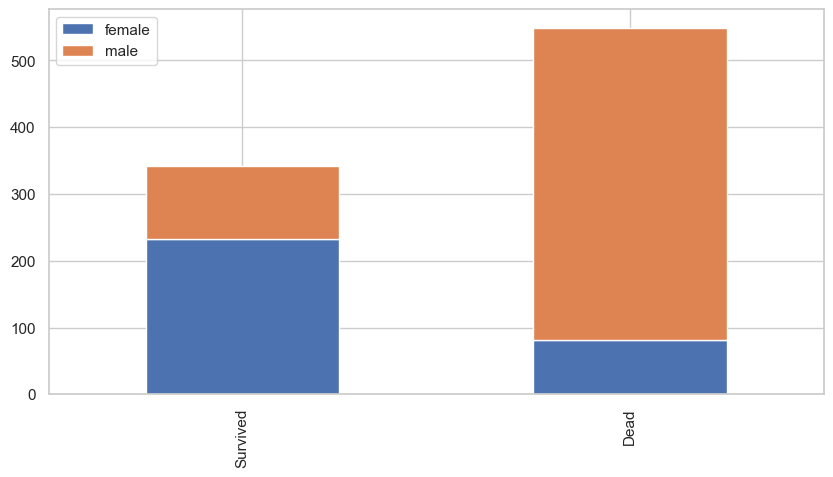

In [ ]:
# 차트는 여성이 남성보다 생존할 가능성이 더 높다 => lady first 문화?
bar_chart('Sex')

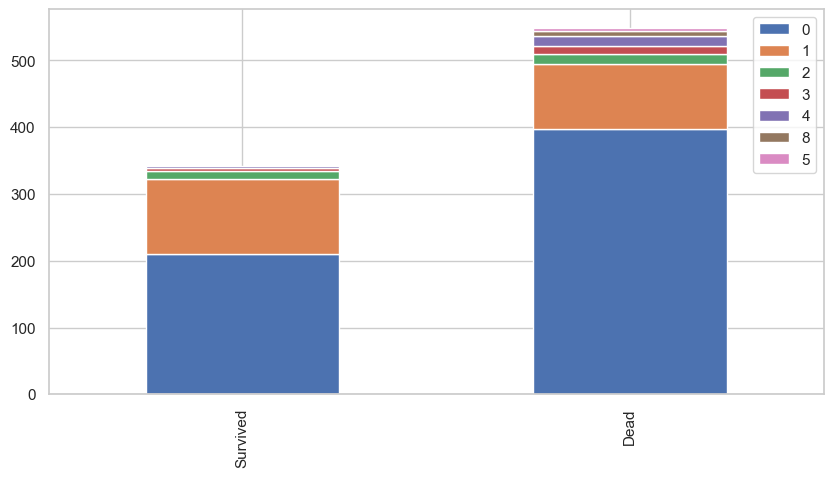

In [ ]:
# 형제나 배우자가 있는 사람들이 생존할 가능성이 더 높다
bar_chart('SibSp')

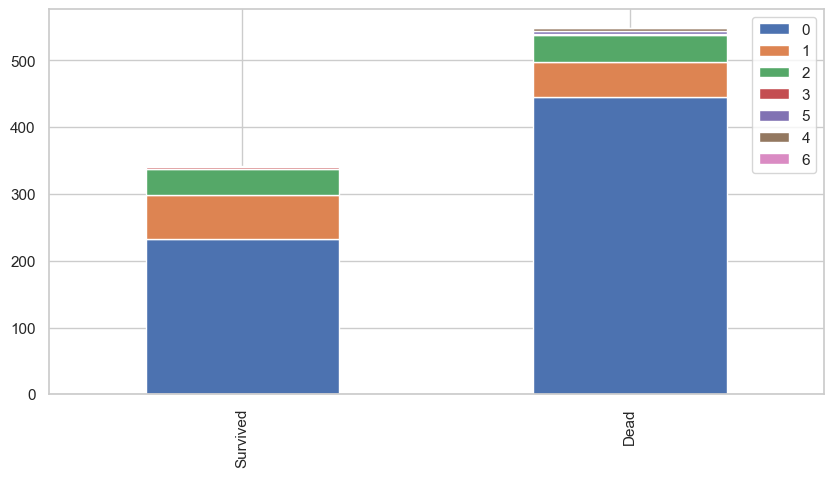

In [ ]:
# 혼자인 사람보다 부모나 자식이 있는 사람들이 생존할 가능성이 더 높다
bar_chart('Parch')

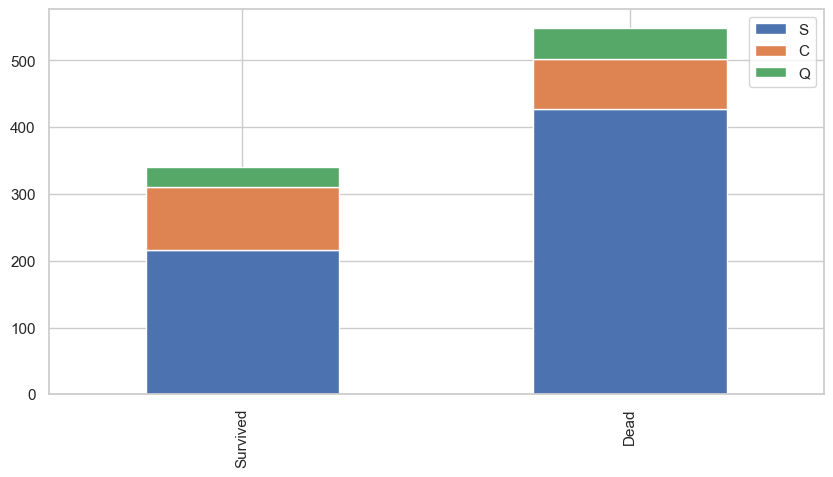

In [ ]:
# C 선착장 탑승자의 경우 생존자가 더 많다
bar_chart('Embarked')

## 성별에 따른 클래스 생존 비율 그래프

In [ ]:
# Both Sex and Pclass - seaborn factorplot
# hue로 지정된 만큼 선을 그려줌 Sex : male, female 2선

#모든 클래스에서 female 이 살 확률이 male 보다 높음
#또한 남자, 여자 상관없이 클래스가 높을 수록(1클래스) 살 확률 높음
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train, 
               size=6, aspect=1.5)

AttributeError: module 'seaborn' has no attribute 'factorplot'

![%EC%A3%BC%ED%94%BC%ED%84%B0%EC%97%90%EC%84%9C%20%EC%84%A4%EC%B9%98%EA%B0%80%20%EC%95%88%EB%90%A0%EB%95%8C.png](attachment:%EC%A3%BC%ED%94%BC%ED%84%B0%EC%97%90%EC%84%9C%20%EC%84%A4%EC%B9%98%EA%B0%80%20%EC%95%88%EB%90%A0%EB%95%8C.png)

In [ ]:
# Both Sex and Pclass - seaborn factorplot
# hue로 지정된 만큼 선을 그려줌 Pclass : 1,2,3 3선
sns.factorplot('Sex', 'Survived', hue='Pclass', data=train, 
               size=6, aspect=1.5)

AttributeError: module 'seaborn' has no attribute 'factorplot'

![%EC%A3%BC%ED%94%BC%ED%84%B0%EC%97%90%EC%84%9C%20%EC%84%A4%EC%B9%98%EA%B0%80%20%EC%95%88%EB%90%A0%EB%95%8C.png](attachment:%EC%A3%BC%ED%94%BC%ED%84%B0%EC%97%90%EC%84%9C%20%EC%84%A4%EC%B9%98%EA%B0%80%20%EC%95%88%EB%90%A0%EB%95%8C.png)

In [ ]:
# Both Sex and Pclass - seaborn factorplot
# col로 지정된 만큼 선을 각각 그려줌 Pclass : 1,2,3 3개
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=train, 
               size=9, aspect=1)

AttributeError: module 'seaborn' has no attribute 'factorplot'

![%EC%A3%BC%ED%94%BC%ED%84%B0%EC%97%90%EC%84%9C%20%EC%84%A4%EC%B9%98%EA%B0%80%20%EC%95%88%EB%90%A0%EB%95%8C.png](attachment:%EC%A3%BC%ED%94%BC%ED%84%B0%EC%97%90%EC%84%9C%20%EC%84%A4%EC%B9%98%EA%B0%80%20%EC%95%88%EB%90%A0%EB%95%8C.png)

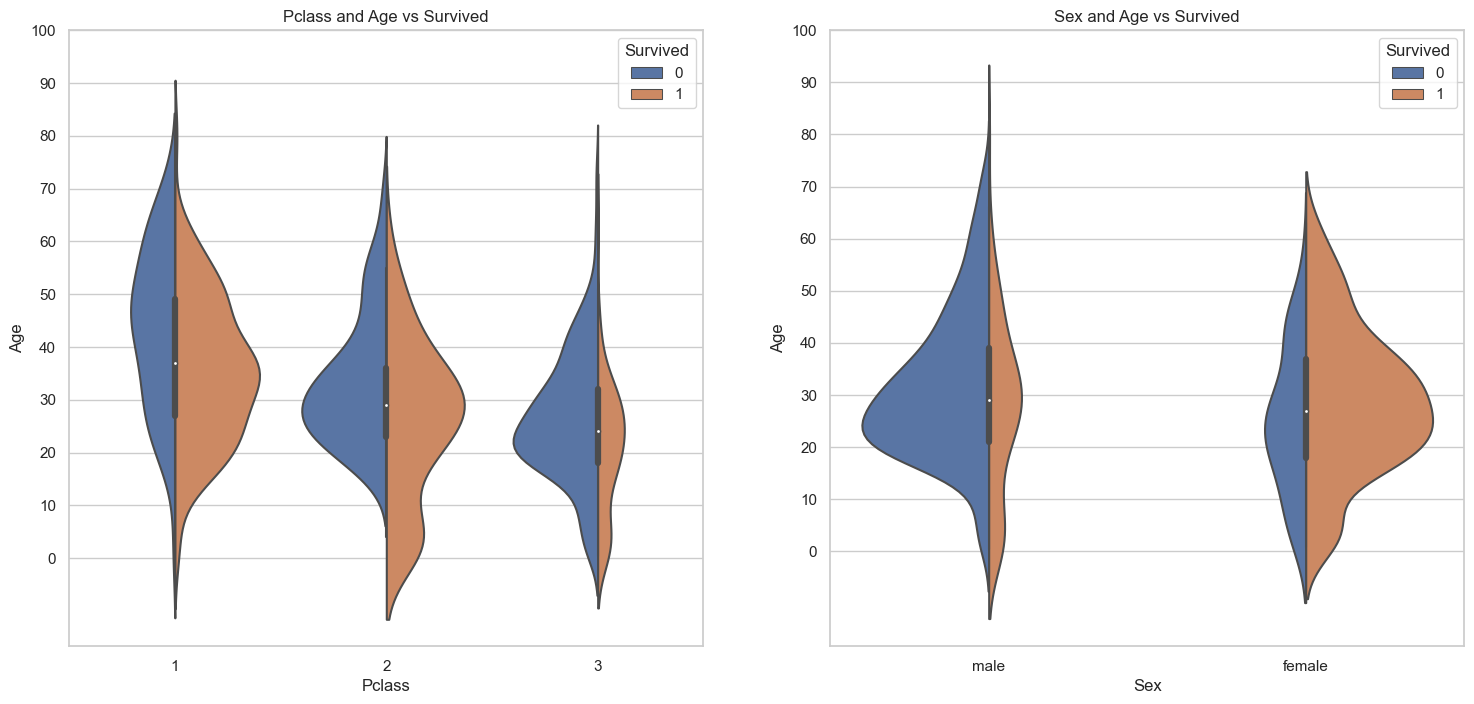

In [ ]:
# Pclass, Sex, Age 3개 변수 그래프 seaborn 의 violinplot
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot(x="Pclass",y="Age", hue="Survived", 
               data=train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot(x="Sex",y="Age", hue="Survived", 
               data=train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### Feature engineering
*  데이터에 대한 도메인 지식을 사용하여 기계 학습 알고리즘을 작동시키는 Feature(Feature vectors)를
   만드는 과정 -feature vector는 어떤 object를 나타내는 숫자 형상의 n차원 벡터
*  머신 러닝에 있어 많은 알고리즘은 object들의 수치적 표현을 필요로 함
*  어떻게 타이타닉은 가라앉았나?

![image.png](attachment:image.png)

*  그림에서 타이타닉의 머릿부분인 오른쪽 뱃머리가 빙하에 부딧히면서 바다에 잠김
*  그러면서 그 부분에 있던 3등급 칸이 가장 먼저 잠기면서 사람들이 많이 죽게 됨
*  반면 반대쪽 3등급 칸은 시간이 더 있었을테니 살아남을 가능성 높아 보임
*  1,2등급은 생존하기에 더 좋은 위치
*  그렇기 때문에 티켓의 등급은 생존 유무를 구하는 좋은 변수
### 데이터 세트 초기화

In [ ]:
train_test_data = [train, test]

In [ ]:
train_test_data[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Name
*  name에 따라서 사람이 죽었다 살았다 판단은 못함
*  남성과 여성을 나타내는 Mr., Miss, Mrs. 값을 통해 정보 추출 가능

In [ ]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
train['Name'].str  #pandas사용하는 문자열로 변경

In [ ]:
train['Name'].str.extract('([A-Za-z]+)\.', expand=False)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [ ]:
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [ ]:
train.head(3).T
test.head(3).T

,0,1,2
PassengerId,892,893,894
Pclass,3,3,2
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis"
Sex,male,female,male
Age,34.5,47.0,62.0
SibSp,0,1,0
Parch,0,0,0
Ticket,330911,363272,240276
Fare,7.8292,7.0,9.6875
Cabin,NaN,NaN,NaN


In [ ]:
train['Title'].value_counts()
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [ ]:
train[train['Title']=='Don']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Don


## 각 호칭 숫자에 매핑 = 레이블 인코딩
*  Title mapping
*  Mr: 0
*  Miss: 1
*  Mrs: 2
*  Others: 3

In [ ]:
title_mapping = {"Mr":0,"Miss":1,"Mrs":2,
                 "Master":3, "Dr":3, "Rev":3, "Col": 3, 'Ms': 3, 'Mlle': 3, "Major": 3, 'Lady': 3, 'Capt': 3,
                 'Sir': 3, 'Don': 3,'Dona': 3,'Mme':3, 'Jonkheer': 3, 'Countess': 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)  
    
    #map은 판다스에 있는 map이다 파이썬에 있는 맵이 아니다. 찾아서 바꿔주는 함수

In [ ]:
train.head(3).T

,0,1,2
PassengerId,1,2,3
Survived,0,1,1
Pclass,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina"
Sex,male,female,female
Age,22.0,38.0,26.0
SibSp,1,1,0
Parch,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282
Fare,7.25,71.2833,7.925


In [ ]:
train[train['Title']=='Mr'] = 0 #map함수를 이용안하면 이렇게 써야한다.

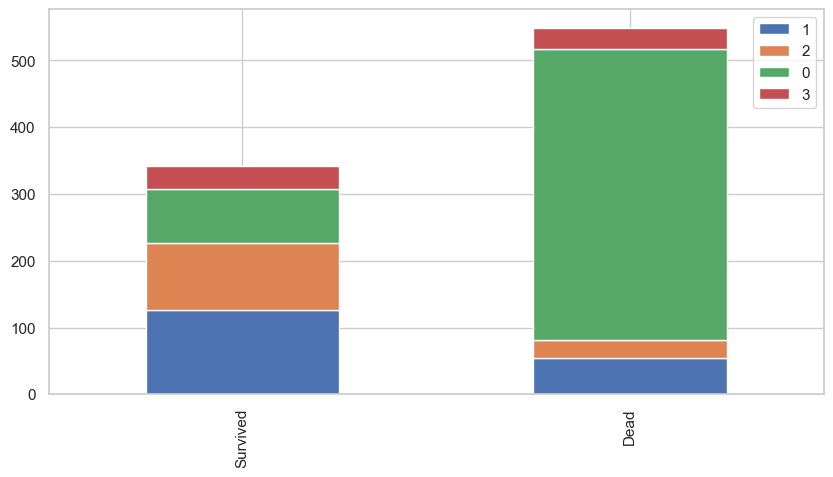

In [ ]:
bar_chart('Title')

In [ ]:
if 'Name' in train.columns:
    train.drop('Name', axis=1, inplace=True)
if 'Name' in test.columns:
    test.drop('Name', axis=1, inplace=True)

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

In [ ]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title'],
      dtype='object')

### Sex
*  남자인지 여자인지 이미 명확히 구분되어 있는 정보로 텍스트를 숫자로만 변환
*  male: 0 female:1

In [ ]:
sex_mapping = {'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

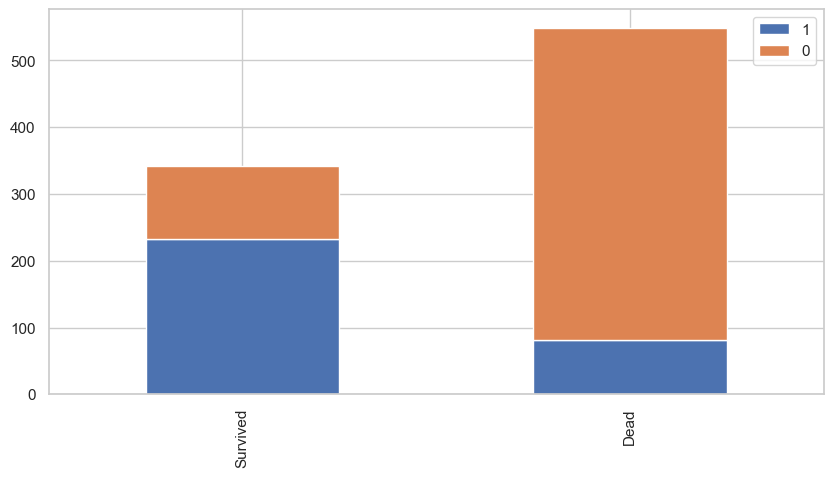

In [ ]:
bar_chart('Sex')

### Age
*  주의할 점은 중간중간에 빠진 정보가 존재한다는 사실
*  missing information에 대해서는 과학적인 방법을 이용해서 채워줘야 함
*  가장 기본적인 생각으로는 나머지 모든 사람의 나이의 평균을 구해 채워주는 방법
*  조금더 과학적인 방법으로 접근
*  위에서 구했던 Title에서 남성끼리 평균나이 Mr.끼리 평균나이 Miss끼리 평균나이를 구해서 채워주면  
   전체 평균을 구해 채워주는 방법보다 더 나을 것

In [ ]:
# Missing Age를 각 Title에 대한 연령의 중간값 으로 채운다(Mr, Mrs, Miss, Others)
# 그룹단위 통계량 추가 transform() - https://rfriend.tistory.com/403
gr_ta = train.groupby('Title')['Age'].transform('median')
train['Age'].fillna(gr_ta, inplace=True)

In [ ]:
gr_ta = test.groupby('Title')['Age'].transform('median')
test['Age'].fillna(gr_ta, inplace=True)

<AxesSubplot: >

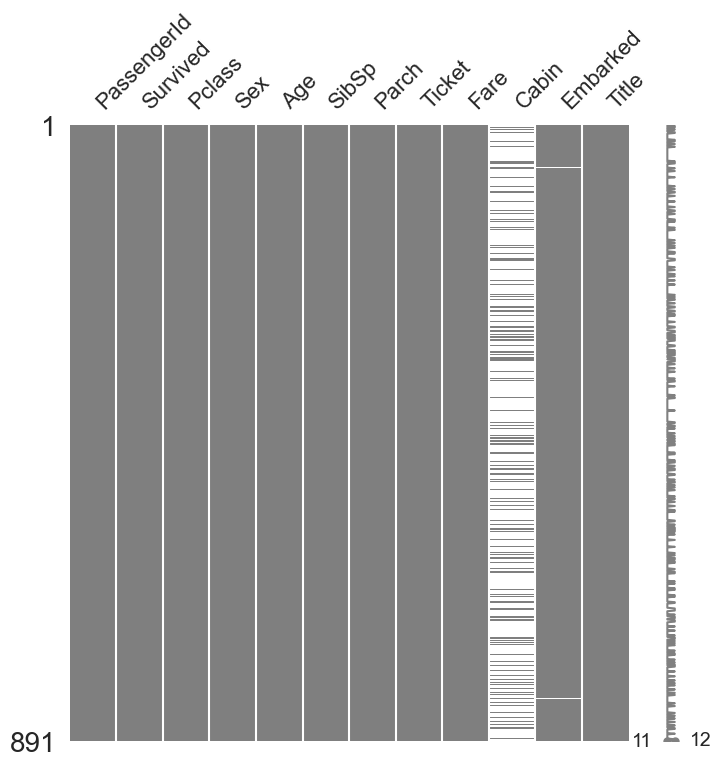

In [ ]:
msno.matrix(df=train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.5, 0.5))  #위와 다름

<AxesSubplot: >

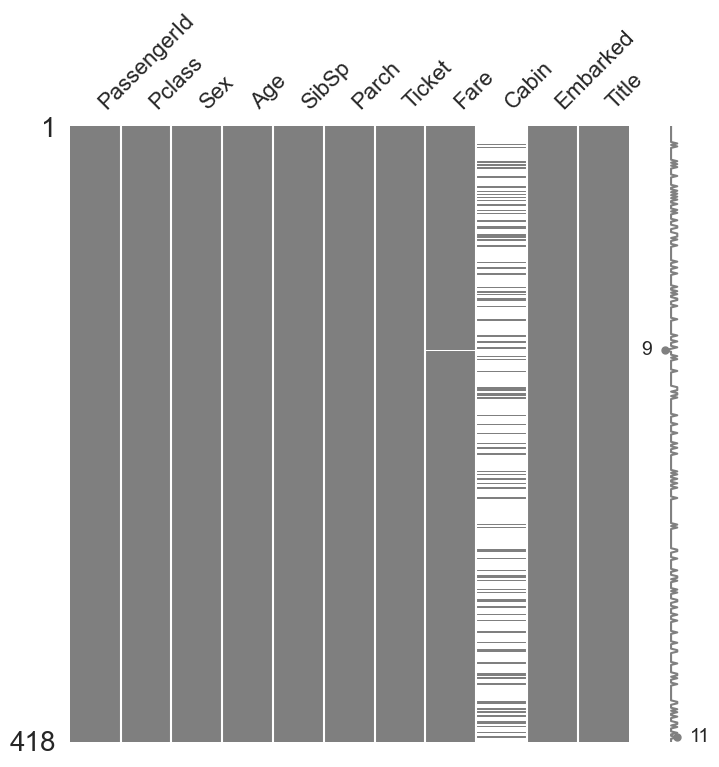

In [ ]:
msno.matrix(df=test.iloc[:, :], figsize=(8, 8), color=(0.5, 0.5, 0.5))  #위와 다름

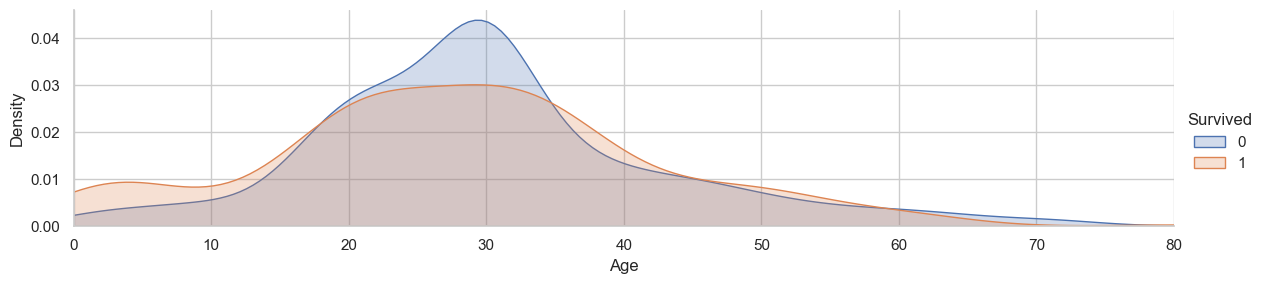

In [ ]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

### feature engineering에서 Binning이라는 기술
*  나이와 같이 잇달아 일어나는 형태의 데이터는 많은 정보를 주지 못하므로 이럴땐  
   각각 하나의 카테고리에 담아 정보를 보다 명확하게 확인할 수 있는 방법

In [ ]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <=16, 'Age']=0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <=26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <=36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <=62), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 62), 'Age'] = 4

In [ ]:
train.head(3).T

,0,1,2
PassengerId,1,2,3
Survived,0,1,1
Pclass,3,1,3
Sex,0,1,1
Age,1.0,3.0,1.0
SibSp,1,1,0
Parch,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282
Fare,7.25,71.2833,7.925
Cabin,NaN,C85,NaN


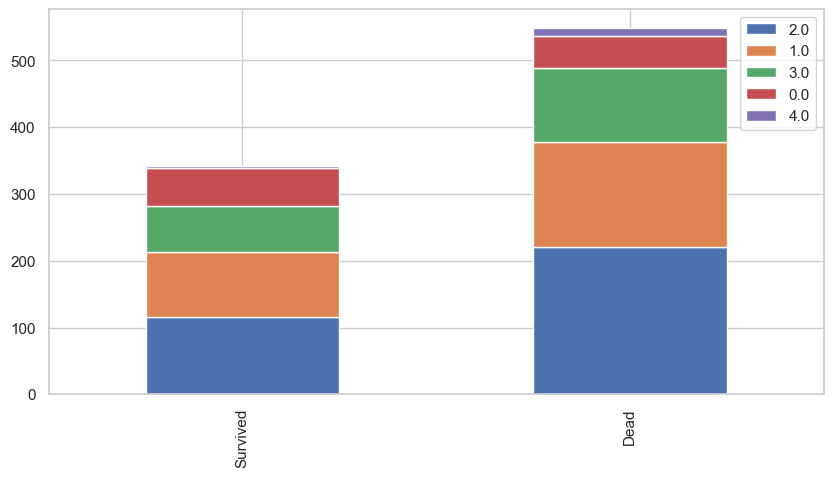

In [ ]:
bar_chart('Age')

### Embarked
*  도시별로 부유한 사람과 가난한 사람의 비율의 차이가 있지 않을까?

In [ ]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df

,S,C,Q
1st class,127,85,2
2nd class,164,17,3
3rd class,353,66,72


<AxesSubplot: >

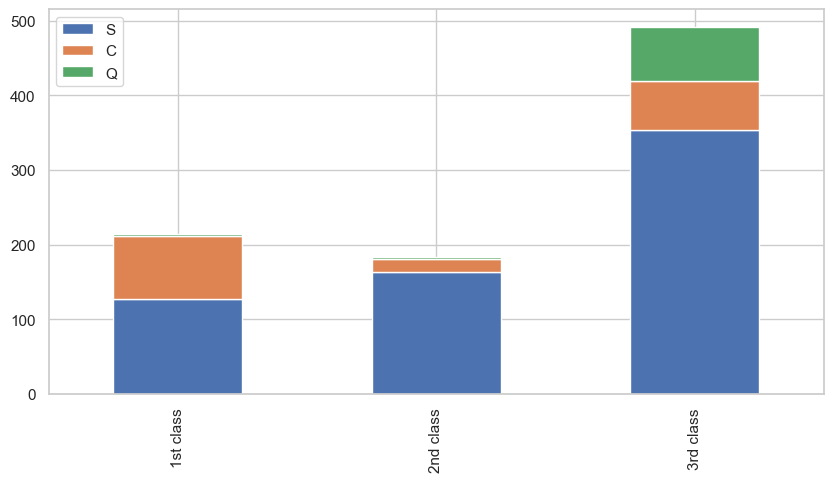

In [ ]:
df.plot(kind='bar', stacked=True, figsize=(10,5))

*  Q 도시에서 탄 사람들은 1등급이 거의 없다.
*  S 도시에서 탑승한 사람들이 대부분을 차지하고 있다.
*  즉, Embarked 정보가 쓰여있지 않다면 S라고 써도 무방할 것 같다.

In [ ]:
# Embarked 정보가 없으면 S를 집어넣자
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [ ]:
# 머신러닝 classifier를 위해 텍스트를 숫자 변경
mappings = {'S':0, 'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(mappings)

In [ ]:
train.head(3).T

,0,1,2
PassengerId,1,2,3
Survived,0,1,1
Pclass,3,1,3
Sex,0,1,1
Age,1.0,3.0,1.0
SibSp,1,1,0
Parch,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282
Fare,7.25,71.2833,7.925
Cabin,NaN,C85,NaN


### Fare
*  티켓 가격이 안채워져 있을때는 어떻게 채울 수 있을까?
*  티켓 가격은 클래스과 관련이 높다.
*  클래스는 missing value가 존재하지 않았다.
*  그러므로 각 클래스의 티켓 가격 가운데 값을 티켓 가격의 missing value에 사용

In [ ]:
train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median')
                     , inplace=True)
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median')
                    , inplace=True)

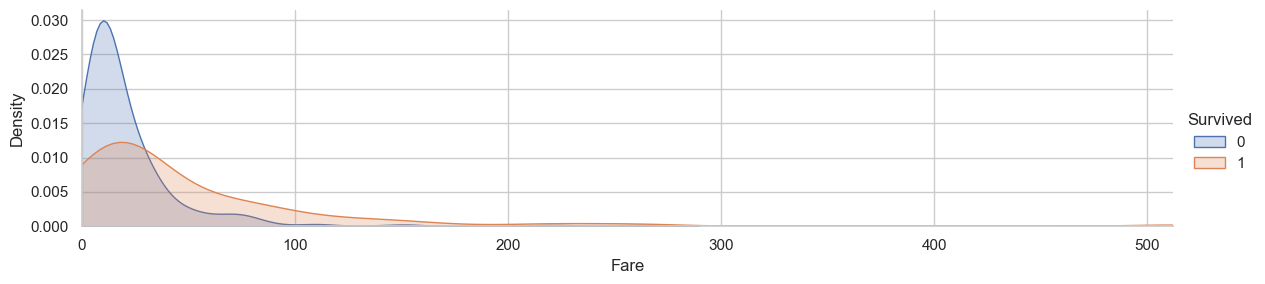

In [ ]:
# 분포 확인
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

In [ ]:
# binning을 사용하여 각 구간별로 티켓 가격을 카테고리에 넣어주자.
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <=17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <=30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <=100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

### Cabin - 객실 번호
*  알파벳으로 시작하고 숫자가 나오는 형태
*  알파벳만 처리(숫자는 처리가 어려움)

In [ ]:
train['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
train['Cabin'].str[:1]

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [ ]:
# for dataset in train_test_data:
#     dataset['Cabin'] = dataset['Cabin'].str[:1]

In [ ]:
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

<AxesSubplot: >

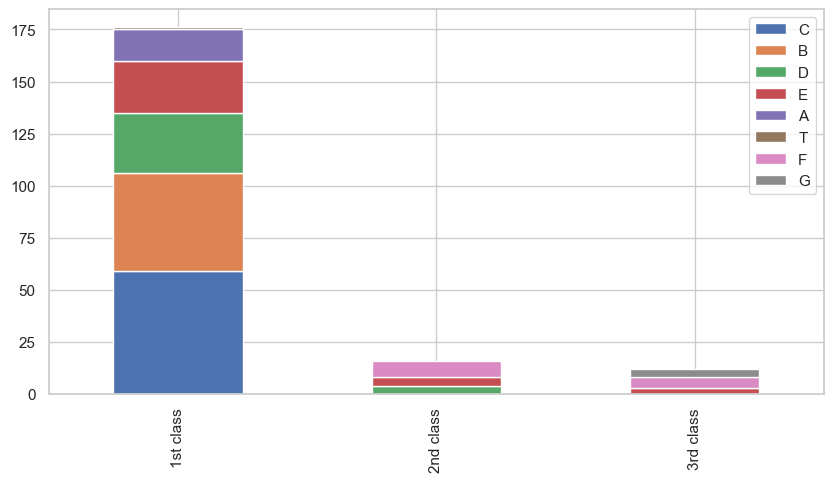

In [ ]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [ ]:
# 1등급에는 ABCDET, 2등급에는 DEF, 3등급은 EFG로 구성
df

,C,B,D,E,A,T,F,G
1st class,59.0,47.0,29.0,25.0,15.0,1.0,NaN,NaN
2nd class,NaN,NaN,4.0,4.0,NaN,NaN,8.0,NaN
3rd class,NaN,NaN,NaN,3.0,NaN,NaN,5.0,4.0


In [ ]:
# classifier를 위해 매핑
# 소수점을 사용하는 이 방법을 feature scaling
# 숫자의 범위가 비슷하지 않으면 큰 거리에 있는 것을 조금 더 중요하게 생각할 수 있다 
cabin_mapping = {'A':0, 'B':0.1, 'C':0.2, 'D':0.3, 'E':0.4
                 , 'F':0.5, 'G':0.6, 'T':0.7}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [ ]:
train.head(3).T

,0,1,2
PassengerId,1,2,3
Survived,0,1,1
Pclass,3,1,3
Sex,0,1,1
Age,1.0,3.0,1.0
SibSp,1,1,0
Parch,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282
Fare,0.0,2.0,0.0
Cabin,NaN,0.2,NaN


In [ ]:
# Cabin의 missing field는 1등급 2등급 3등급 클래스와 밀접한 관계
# 각 클래스별 cabin의 중간값을 missing value 처리
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median')
                      , inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median')
                     , inplace=True)

In [ ]:
train.head(3).T

,0,1,2
PassengerId,1,2,3
Survived,0,1,1
Pclass,3,1,3
Sex,0,1,1
Age,1.0,3.0,1.0
SibSp,1,1,0
Parch,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282
Fare,0.0,2.0,0.0
Cabin,0.5,0.2,0.5


### FamilySize
*  혼자 탔는 지 함께 탔는지에 따른 사망률 확인
*  SibSp : 동반한 형제자매, 배우자 수
*  Parch : 동반한 부모, 자식 수

In [ ]:
# 0 이 혼자 탄 것이라 +1
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [ ]:
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [ ]:
test['FamilySize'].value_counts()

1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: FamilySize, dtype: int64

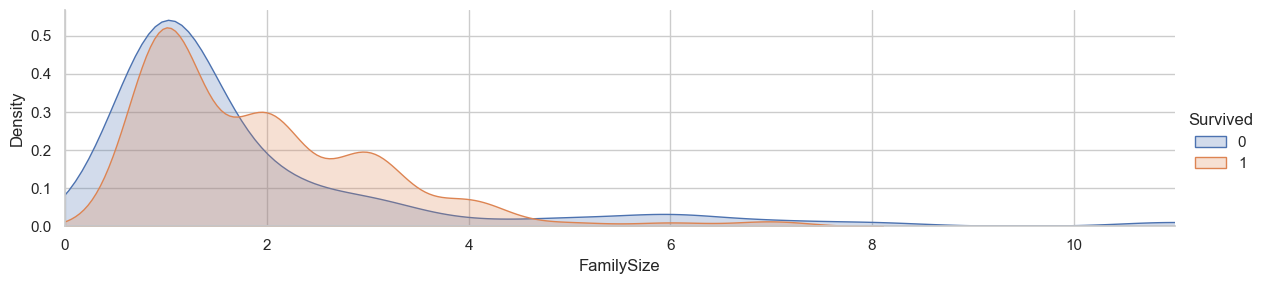

In [ ]:
# 혼자 탔을경우 상당히 많이 죽었음
# 반면 가족이 한명이라도 있을경우 사망률이 많이 줄어들었다는 것을 확인
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

In [ ]:
# 정보들도 숫자에 mapping
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6
                  , 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [ ]:
# 불필요한 Ticket 데이터와 SibSp와 Parch는 필요한 정보 제거
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)
test = test.drop(['PassengerId'], axis=1)

In [ ]:
train.head(3).T

,0,1,2
Survived,0.0,1.0,1.0
Pclass,3.0,1.0,3.0
Sex,0.0,1.0,1.0
Age,1.0,3.0,1.0
Fare,0.0,2.0,0.0
Cabin,0.5,0.2,0.5
Embarked,0.0,1.0,0.0
Title,0.0,2.0,1.0
FamilySize,0.4,0.4,0.0


<AxesSubplot: >

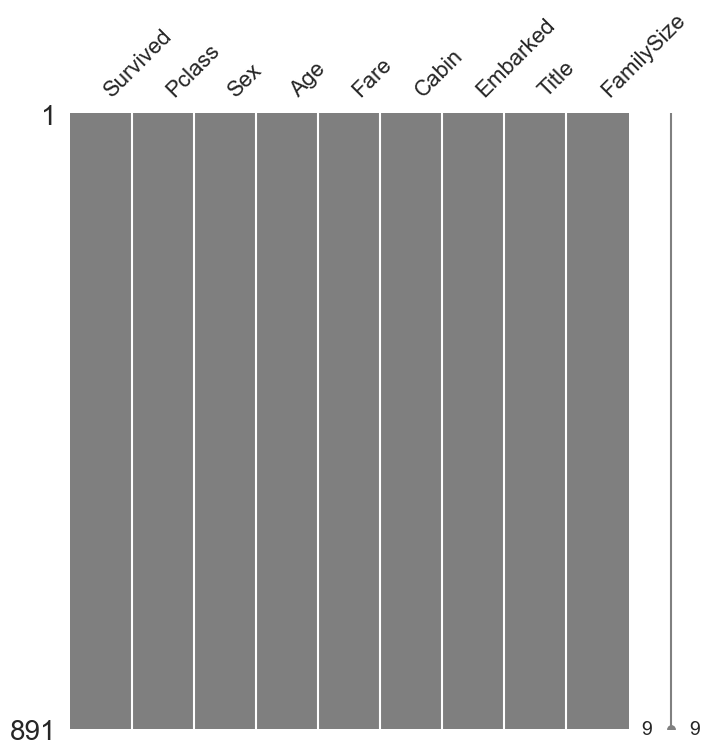

In [ ]:
msno.matrix(df=train.iloc[:, :], figsize=(8, 8), color=(0.5, 0.5, 0.5))  #위와 다름

<AxesSubplot: >

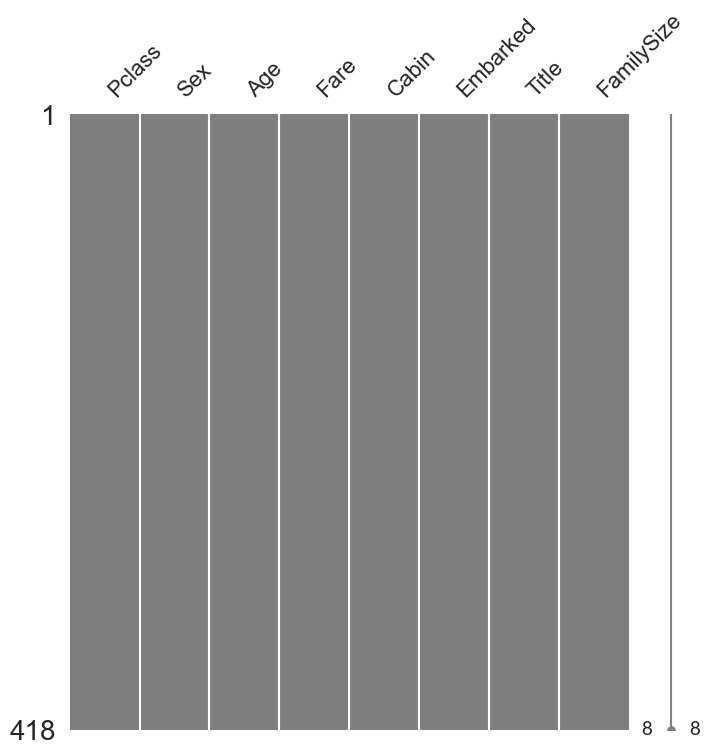

In [ ]:
msno.matrix(df=test.iloc[:, :], figsize=(8, 8), color=(0.5, 0.5, 0.5))  #위와 다름

### 머신러닝
#### 숫자로 정보를 모두 표현 => 머신러닝 classifier를 통해서 prediction
*  타이타닉 문제는 target class(survived)가 있음 => 지도학습
*  target class 는 0, 1로 이루어져 있으므로(binary) binary classfication

In [ ]:
train_data = train.drop('Survived', axis=1)

In [ ]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,0.5,0,0,0.4
1,1,1,3.0,2.0,0.2,1,2,0.4
2,3,1,1.0,0.0,0.5,0,1,0.0
3,1,1,2.0,2.0,0.2,0,2,0.4
4,3,0,2.0,0.0,0.5,0,0,0.0


In [ ]:
train_data.shape

(891, 8)

In [ ]:
target = train['Survived']

In [ ]:
target.shape

(891,)

In [ ]:
# !pip install sklearn

In [ ]:
 # 유명한 randomforestclassfier 입니다. 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(train_data, target)

RandomForestClassifier()

In [ ]:
model.score(train_data, target)

0.9001122334455668

In [ ]:
# 캐글 제출용 예측
prediction = model.predict(test)

In [ ]:
test2 = pd.read_csv(data[1])

In [ ]:
test2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
submission = pd.DataFrame({
    'PassengerId':test2['PassengerId'],
    'Survived':prediction
})

In [ ]:
pd.DataFrame(submission).to_csv('./data/submission_rf_221020.csv', index=False)